# Importing the Dataset

In [1]:
import pandas as pd

In [5]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The columns in the dataset are given as:

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

The target column is 'DIED' which represents if the patient has died due to symptom faced from vaccination. The total number of patients is given as:

In [7]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

We check the relation between the Sale = Quantity * UnitPrice and other variables

In [12]:
df['Sale'] = df['Quantity'] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Therefore, the target column is Sale. Now we need to check the correlation between each of the column and the target column using CHI-SQUARE TEST but before that we need to convert the data from String to frequency table and appropriate. That is, we need to create the CONTINGENCY TABLE.

# Sample CHI-SQUARE Test

In [14]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

contingency_table = pd.crosstab(df['Sale'], df['Country'])
contingency_table.head()

Country,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,RSA,Saudi Arabia,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom,Unspecified
Sale,,,,,,,,,,,,,,,,,,,,,
-168469.60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
-77183.60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
-38970.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
-17836.46,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
-16888.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


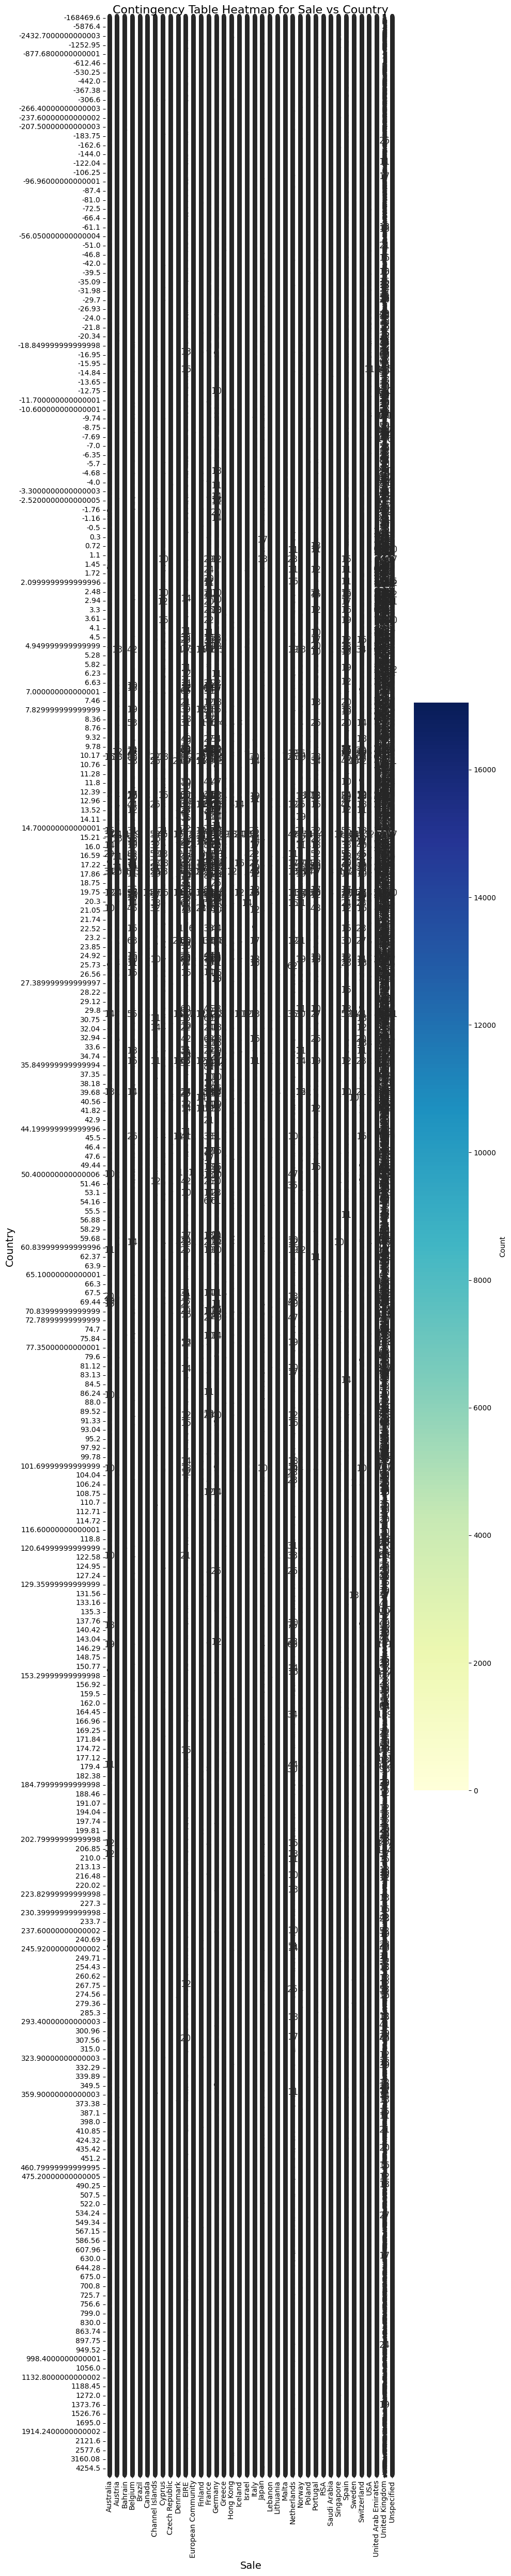

In [15]:
plt.figure(figsize=(10, 50))  # Increase the figure size
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Count'}, annot_kws={"size": 12})

plt.title(f'Contingency Table Heatmap for Sale vs Country', fontsize=16)
plt.xlabel('Sale', fontsize=14)
plt.ylabel(f'Country', fontsize=14)

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

Now, we perform the CHI-SQUARE TEST to check for the correlation between the 'Sale' and 'Country' columns

In [16]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [17]:
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

Chi-Square Statistic: 681618.6152172592
P-value: 0.0
Degrees of Freedom: 229511
Expected Frequencies:
[[2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]
 [2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]
 [2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]
 ...
 [2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]
 [2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]
 [2.32326830e-03 7.39976638e-04 3.50612372e-05 ... 1.25482323e-04
  9.14319563e-01 8.23016411e-04]]


In [18]:
alpha = 0.05  # significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Sale and Country.")
else:
    print("Fail to reject the null hypothesis: No significant association between Sale and Country.")

Reject the null hypothesis: There is a significant association between Sale and Country.


# CHI-SQAURE Test on all  the columns

Now, iterating over all the other features and checking for correlation.

In [19]:
test_columns = ['Description', 'InvoiceDate', 'Country']
test_columns

['Description', 'InvoiceDate', 'Country']

In [ ]:
chi_square_results = {}

for column in test_columns:
    contingency_table = pd.crosstab (df[column], df['Sale'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    plt.figure(figsize=(10, 50))  # Increase the figure size
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=1, cbar_kws={'label': 'Count'}, annot_kws={"size": 12})

    plt.title(f'Contingency Table Heatmap for {column} vs Sale', fontsize=16)
    plt.xlabel('DIED', fontsize=14)
    plt.ylabel(f'{column}', fontsize=14)

    plt.tight_layout()
    plt.show()
    
    
    chi_square_results[column] = {'Chi2 Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof}

    print(f"Feature: {column}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of Freedom: {dof}")
    print('-' * 50)

# Interpreting Results

In [20]:
related_columns = []
unrelated_columns = []

Displaying the results

In [21]:
alpha = 0.05
for column, result in chi_square_results.items():
    if result['p-value'] < alpha:
        related_columns.append(column)
        print(f"{column}: Significant association (p-value: {result['p-value']})")
    else:
        unrelated_columns.append(column)
        print(f"{column}: No significant association (p-value: {result['p-value']})")

NameError: name 'chi_square_results' is not defined

In [17]:
print(f"The related columns are: \n {related_columns}")

The related columns are: 
 ['SYMPTOM', 'ASSIGNED_GROUP', 'SEVERITY_LEVEL', 'HOSPITAL', 'AGE_YRS', 'AGE_GROUP', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'ALLERGIES', 'F', 'M', 'JANSSEN', 'VAX_DOSE_SERIES_1', 'VAX_DOSE_SERIES_2', 'VAX_SITE_LA', 'VAX_SITE_RA', '18-25', '26-35', '36-45', '46-55', '66-75', '76-85', '86-95', '96 +']


In [18]:
print(f"The unrelated columns are: \n {unrelated_columns}")

The unrelated columns are: 
 ['L_THREAT', 'MODERNA', 'PFIZER', '56-65']
